In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

sns.set_theme(style="whitegrid")

In [87]:
wine = pd.read_csv("winequality.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [88]:
# check if col need scaling or not
for col in wine.columns:
    if wine[col].dtype != "object":
        if wine[col].min() <= -3 or wine[col].max() >= 3:
            print(col)
            print("needs scaling")
            print(f"skewness value {wine[col].skew()}")
        print("-" * 20)

fixed acidity
needs scaling
skewness value 1.7228045308969795
--------------------
--------------------
--------------------
residual sugar
needs scaling
skewness value 1.4349998392718966
--------------------
--------------------
free sulfur dioxide
needs scaling
skewness value 1.2200660740665203
--------------------
total sulfur dioxide
needs scaling
skewness value -0.001177478234437964
--------------------
--------------------
pH
needs scaling
skewness value 0.3869659325699095
--------------------
--------------------
alcohol
needs scaling
skewness value 0.5657177290960251
--------------------
quality
needs scaling
skewness value 0.1896226933726968
--------------------


3.8
15.9
1.7228045308969795


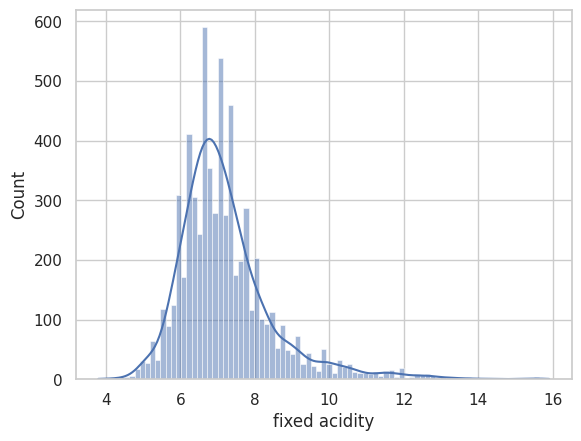

In [89]:
print(wine["fixed acidity"].min())
print(wine["fixed acidity"].max())
sns.histplot(x=wine["fixed acidity"], kde=True)
print(wine["fixed acidity"].skew())

0.6
65.8
1.4349998392718966


<Axes: xlabel='residual sugar', ylabel='Count'>

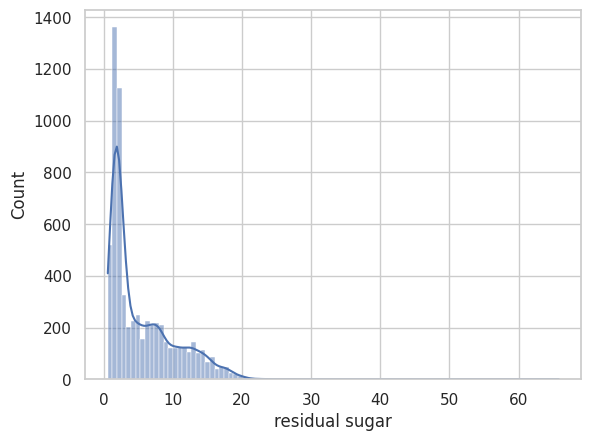

In [90]:
print(wine["residual sugar"].min())
print(wine["residual sugar"].max())
print(wine["residual sugar"].skew())
sns.histplot(x=wine["residual sugar"], kde=True)

1.0
289.0
1.2200660740665203


<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

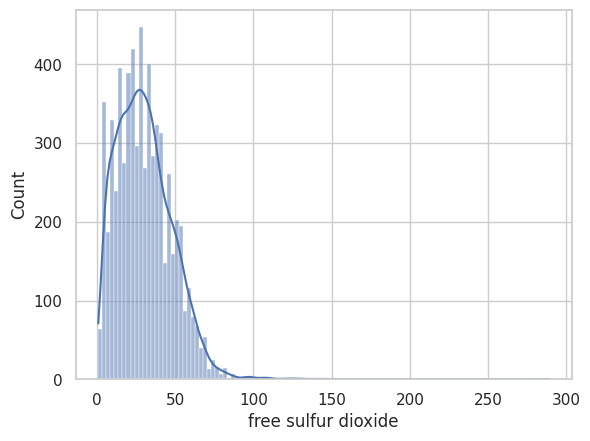

In [91]:
print(wine["free sulfur dioxide"].min())
print(wine["free sulfur dioxide"].max())
print(wine["free sulfur dioxide"].skew())
sns.histplot(x=wine["free sulfur dioxide"], kde=True)

6.0
440.0
1.2200660740665203


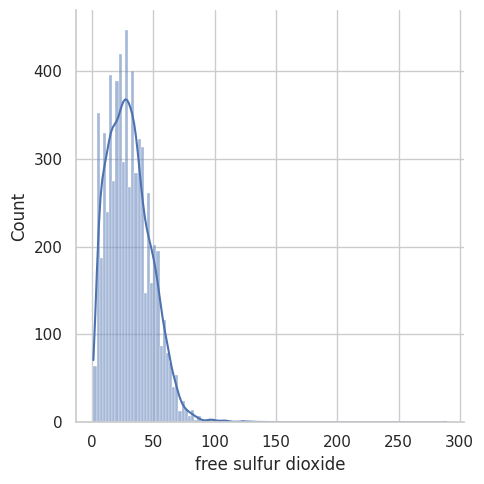

In [92]:
print(wine["total sulfur dioxide"].min())
print(wine["total sulfur dioxide"].max())
print(wine["free sulfur dioxide"].skew())
sns.displot(x=wine["free sulfur dioxide"], kde=True)

2.72
4.01
0.3869659325699095


<Axes: xlabel='pH', ylabel='Count'>

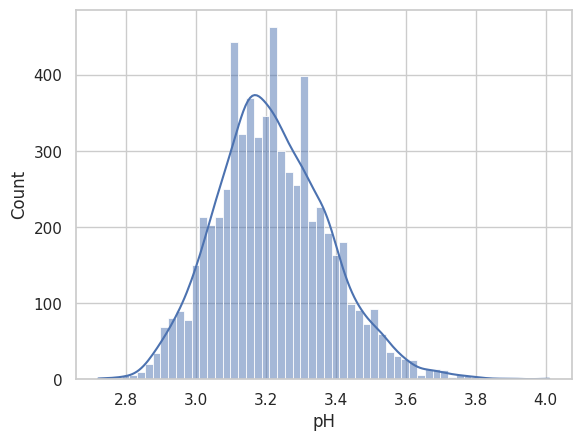

In [93]:
print(wine["pH"].min())
print(wine["pH"].max())
print(wine["pH"].skew())
sns.histplot(x=wine["pH"], kde=True)

8.0
14.9
0.5657177290960251


<Axes: xlabel='alcohol', ylabel='Count'>

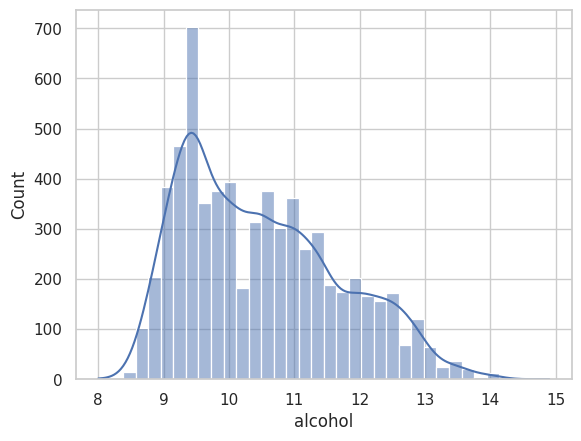

In [94]:
print(wine["alcohol"].min())
print(wine["alcohol"].max())
print(wine["alcohol"].skew())
sns.histplot(x=wine["alcohol"], kde=True)

3
9
0.1896226933726968


<Axes: xlabel='quality', ylabel='Count'>

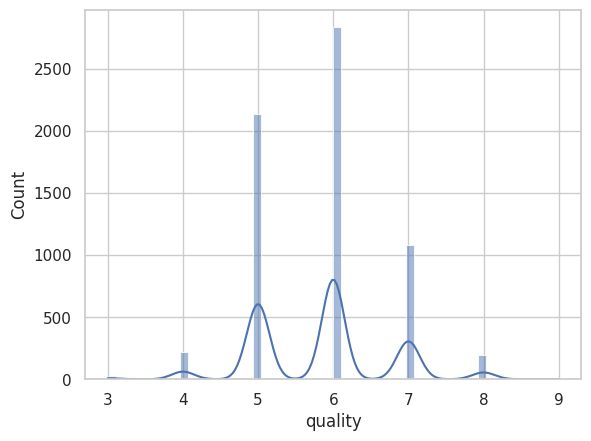

In [95]:
print(wine["quality"].min())
print(wine["quality"].max())
print(wine["quality"].skew())
sns.histplot(x=wine["quality"], kde=True)

In [96]:
feature_for_standard = ["pH", "quality"]
wine[feature_for_standard] = StandardScaler().fit_transform(wine[feature_for_standard])
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,-1.358722,0.45,8.8,0.207999
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.507693,0.49,9.5,0.207999
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.258838,0.44,10.1,0.207999
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,-0.176659,0.40,9.9,0.207999
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,-0.176659,0.40,9.9,0.207999


In [97]:
feature_for_power_transform = [
    "fixed acidity",
    "residual sugar",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "alcohol",
]
scaler = PowerTransformer(method="box-cox")
wine[feature_for_power_transform] = scaler.fit_transform(
    wine[feature_for_power_transform]
)
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,0.002517,0.27,0.36,1.787526,0.045,0.876050,0.952011,1.0010,-1.358722,0.45,-1.717094,0.207999
1,white,-0.733608,0.30,0.34,-1.004562,0.049,-0.935017,0.318126,0.9940,0.507693,0.49,-0.826961,0.207999
2,white,0.868280,0.28,0.40,0.750182,0.050,0.134716,-0.288972,0.9951,0.258838,0.44,-0.198580,0.207999
3,white,0.182742,0.23,0.32,0.963788,0.058,0.964062,1.212719,0.9956,-0.176659,0.40,-0.396168,0.207999
4,white,0.182742,0.23,0.32,0.963788,0.058,0.964062,1.212719,0.9956,-0.176659,0.40,-0.396168,0.207999


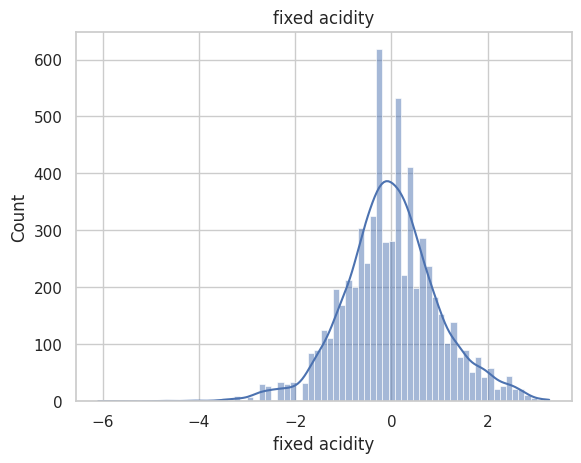

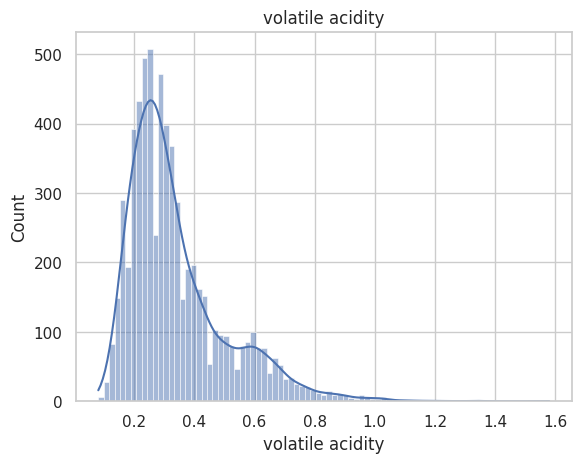

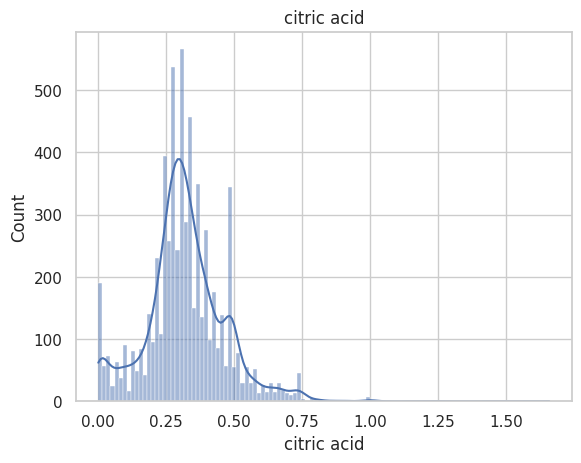

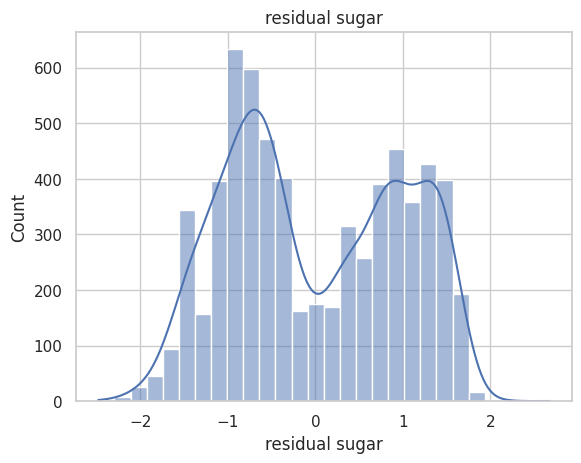

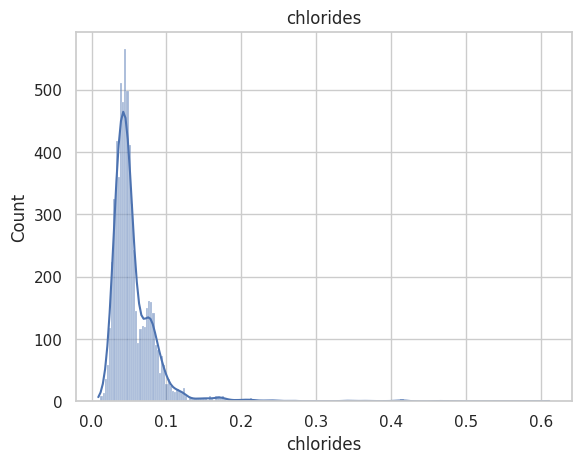

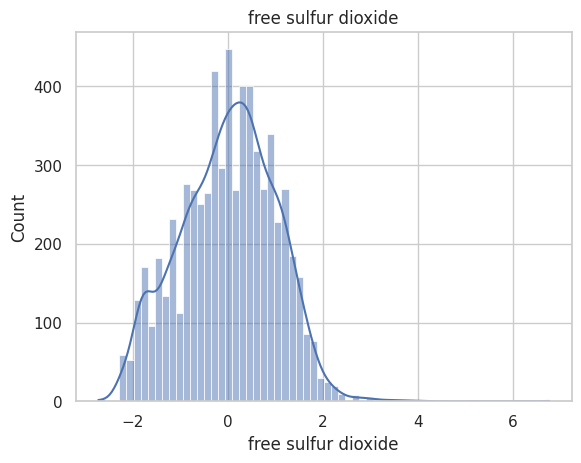

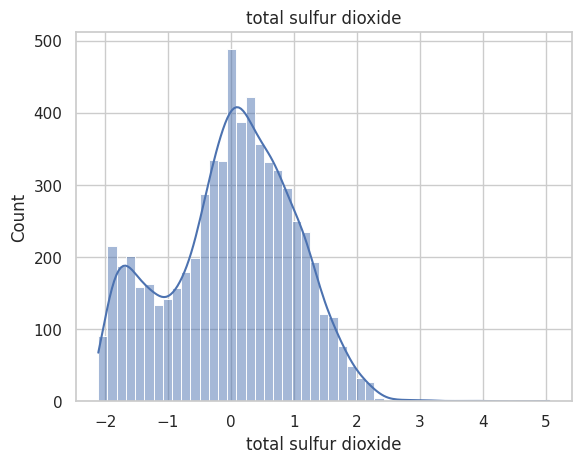

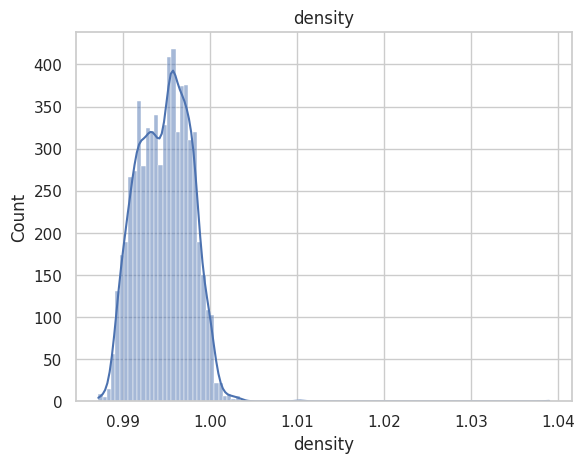

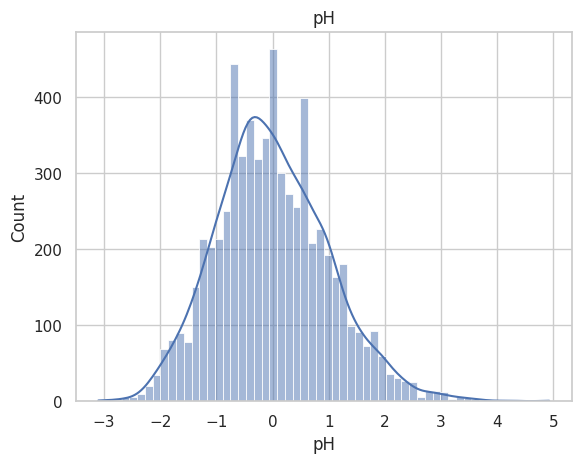

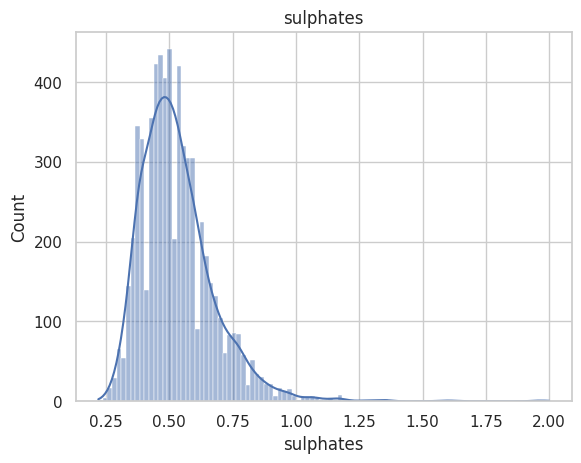

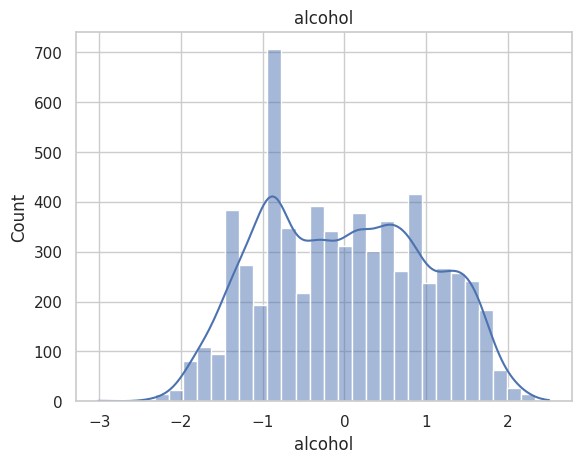

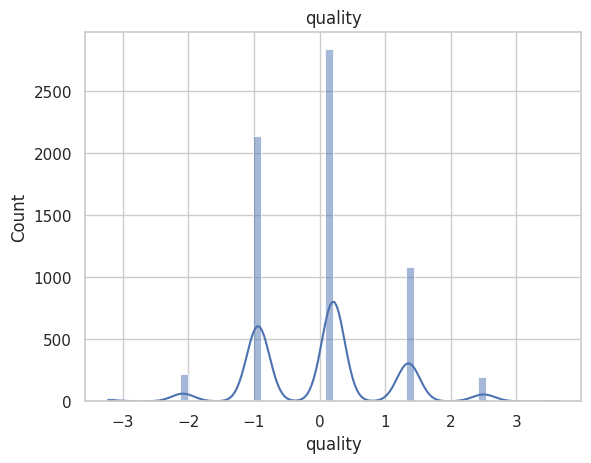

In [98]:
for col in wine.columns:
    if wine[col].dtype != "object":
        sns.histplot(x=wine[col], kde=True)
        plt.title(col)
        plt.show()